In [21]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

w0_gt = -0.3
w1_gt = 0.5

np.random.seed(42) 
x = np.random.uniform(low=-1, high=1, size=20)
y = w0_gt + w1_gt * x + np.random.normal(loc=0, scale=0.2, size=20)

alpha = 2
beta = 25

def likelihood( x, y, w):
    return np.exp(-beta/2*np.sum((y-linear_regression(w,x))**2))*np.sqrt(beta)/np.sqrt(2*np.pi)  
    
def prior(w):
    return np.exp(-np.sum(w**2)/4)/(4*np.pi)

def linear_regression(w,x):
    return w[0] + w[1]*x

def posterior(x, y, w):
    return likelihood(x, y, w) * prior(w)

w0_values = np.linspace(-1, 1, 100)
w1_values = np.linspace(-1, 1, 100)
W0, W1 = np.meshgrid(w0_values, w1_values)

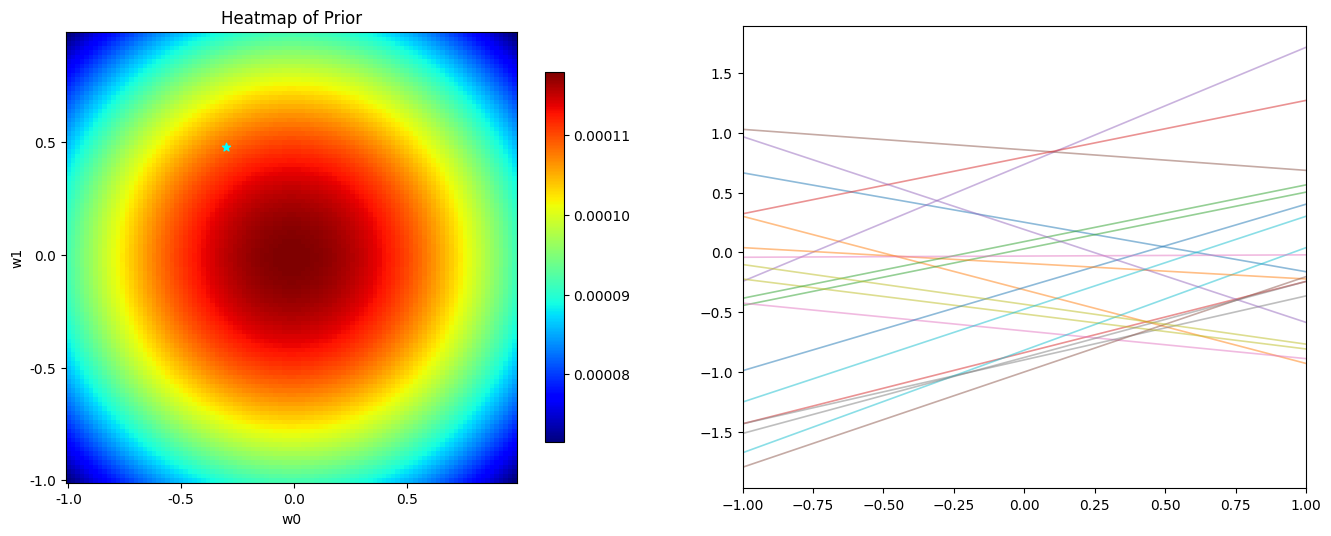

In [44]:
# problem 1a
prior_values = np.zeros_like(W0)

for i in range(len(w0_values)):
    for j in range(len(w1_values)):
        prior_values[j, i] = prior(np.array([w0_values[i], w1_values[j]]))

prior_values=prior_values/np.sum(prior_values) # normalize the prior

samples = np.zeros((20,2))
for i in range(20):
    w_idx = np.random.choice(10000, p=prior_values.reshape(-1))
    # w0 = w0_values[w_idx//100] 
    # w1 = w1_values[w_idx%100]
    w0 = W0.reshape(-1)[w_idx]
    w1 = W1.reshape(-1)[w_idx]
    samples[i] = np.array([w0, w1])

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[1].set_xlim([-1,1])
for i in range(20):
    w = samples[i]
    x_range = np.array([-1,1])
    y_range = linear_regression(w,x_range)
    axs[1].plot(x_range, y_range, linewidth=1.2, alpha=0.5)

im = axs[0].imshow(prior_values,
          origin='lower',
          cmap='jet', 
        #   interpolation='bilinear' #bilinear bicubic
         )
axs[0].set_xticks(np.linspace(0, len(w0_values), 5))
axs[0].set_xticklabels(np.round(np.linspace(-1, 1, 5), 2))
axs[0].set_yticks(np.linspace(0, len(w1_values), 5))
axs[0].set_yticklabels(np.round(np.linspace(-1, 1, 5), 2))
w0_idx = np.argmin(np.abs(w0_values - w0_gt))
w1_idx = np.argmin(np.abs(w1_values - w1_gt))
axs[0].scatter(w0_idx, w1_idx, color='cyan', marker='*', label='Ground Truth')

axs[0].set_xlabel('w0')
axs[0].set_ylabel('w1')
axs[0].set_title('Heatmap of Prior')
cb = fig.colorbar(im, shrink=0.8)
# cb.ax.set_ylabel('Prior Probability')
plt.show() 


In [36]:
def add_data(n_data):
    post_values = np.zeros_like(W0)
    for i in range(len(w0_values)):
        for j in range(len(w1_values)):
            w = np.array([w0_values[i], w1_values[j]])
            data_x = x[0:n_data]
            data_y = y[0:n_data]
            post_values[j, i] = posterior(data_x, data_y, w)

    post_values = post_values/np.sum(post_values) # normalize the posterior

    samples_pos = np.zeros((20,2))
    for i in range(20):
        w_idx = np.random.choice(10000, p=post_values.reshape(-1))
        # w0 = w0_values[w_idx//100] 
        # w1 = w1_values[w_idx%100]
        w0 = W0.reshape(-1)[w_idx]
        w1 = W1.reshape(-1)[w_idx]
        samples_pos[i] = np.array([w0, w1])

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    im = axs[0].imshow(post_values,
            origin='lower',
            cmap='jet', 
            interpolation='bicubic' 
            )
    axs[0].set_xticks(np.linspace(0, len(w0_values), 5))
    axs[0].set_xticklabels(np.round(np.linspace(-1, 1, 5), 2))
    axs[0].set_yticks(np.linspace(0, len(w1_values), 5))
    axs[0].set_yticklabels(np.round(np.linspace(-1, 1, 5), 2))
    w0_idx = np.argmin(np.abs(w0_values - w0_gt))
    w1_idx = np.argmin(np.abs(w1_values - w1_gt))
    axs[0].scatter(w0_idx, w1_idx, color='brown', marker='*', label='Ground Truth')

    axs[0].set_xlabel('w0')
    axs[0].set_ylabel('w1')
    axs[0].set_title(f'Posterior Probability Given {n_data} Data points')
    cb = fig.colorbar(im, shrink=0.8)

    axs[1].set_xlim([-1,1])
    axs[1].set_ylim([-1,1])
    for i in range(20):
        w = samples_pos[i]
        x_range = np.array([-1,1])
        y_range = linear_regression(w,x_range)
        axs[1].plot(x_range, y_range, linewidth=1.2, alpha=0.5)

    for i in range(n_data):
        axs[1].scatter(x[i], y[i], color='red', marker='o', label=f'(x{i}, y{i})')

    plt.show() 

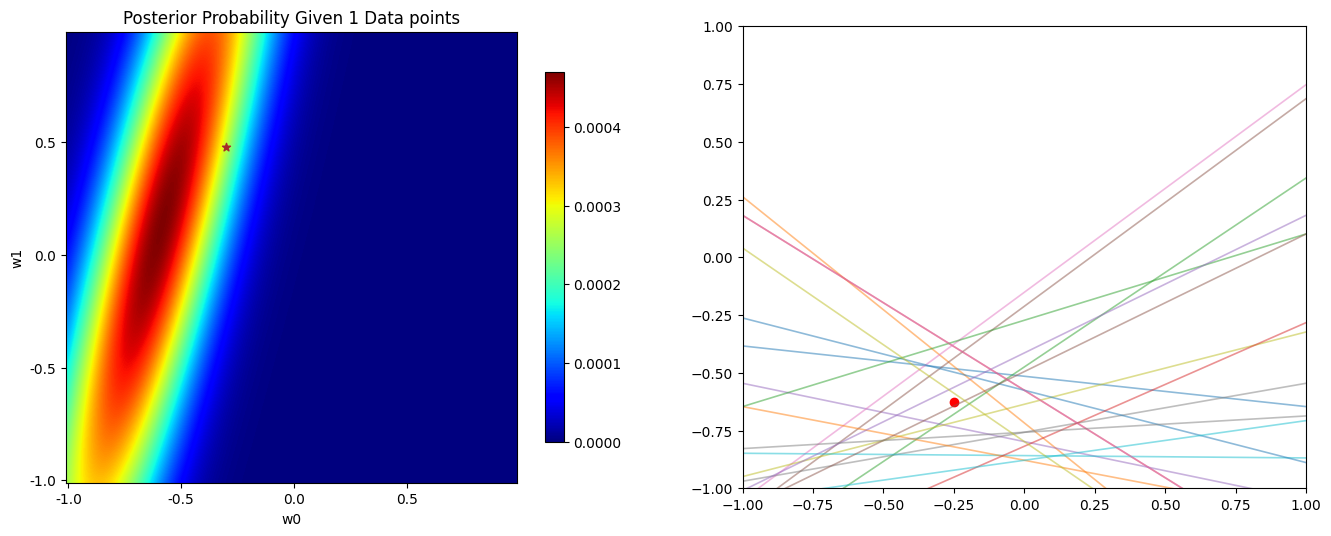

In [45]:
add_data(1)

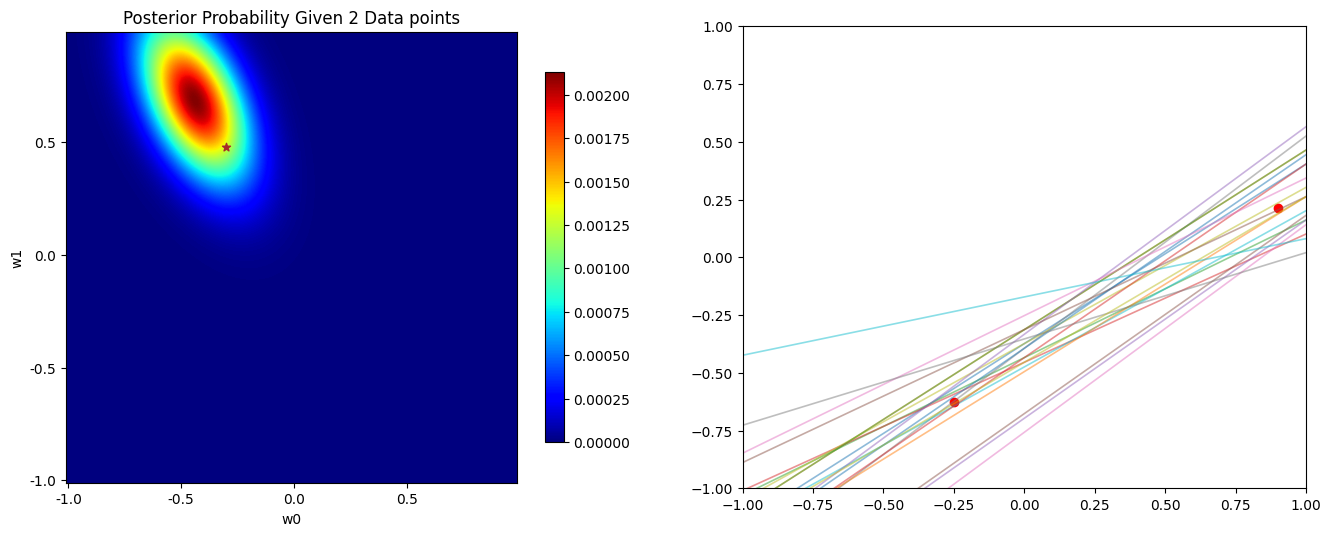

In [38]:
add_data(2)

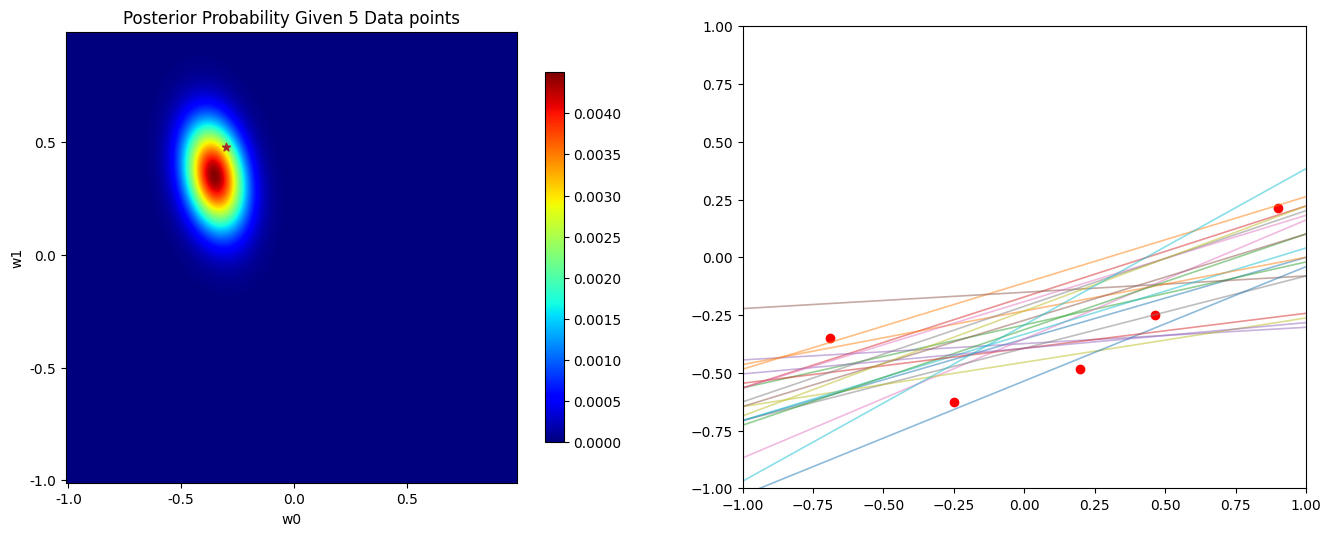

In [39]:
add_data(5)

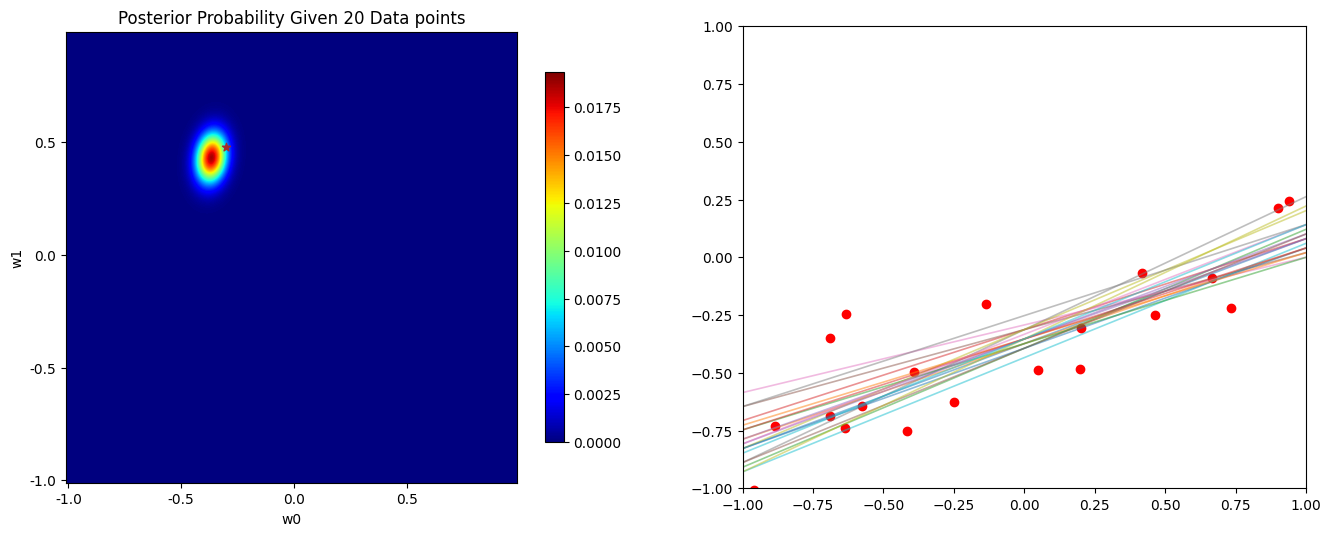

In [40]:
add_data(20)